# Дипломная работа по курсу «Python для анализа данных»

1. Загрузить файл hr.csv (можно найти во сложении к заданию)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше)
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from scipy import stats
%matplotlib inline
import statistics

### 1. Загрузить файл hr.csv

In [57]:
hr = pd.read_csv('HR.csv')
hr.head()
#проверка таблицы на пропуски
#hr.info()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

##### Среднее

In [54]:
print('Среднее для satisfaction_level: ', statistics.mean(hr['satisfaction_level']))
print('Среднее для last_evaluation: ', statistics.mean(hr['last_evaluation']))
print('Среднее для number_project: ', statistics.mean(hr['number_project']))
print('Среднее для average_montly_hours: ', statistics.mean(hr['average_montly_hours']))
print('Среднее для time_spend_company: ', statistics.mean(hr['time_spend_company']))
print('Среднее для Work_accident: ', statistics.mean(hr['Work_accident']))
print('Среднее для left: ', statistics.mean(hr['left']))
print('Среднее для promotion_last_5years: ', statistics.mean(hr['promotion_last_5years']))

Среднее для satisfaction_level:  0.6128335222348157
Среднее для last_evaluation:  0.7161017401160077
Среднее для number_project:  3.80305353690246
Среднее для average_montly_hours:  201.0503366891126
Среднее для time_spend_company:  3.498233215547703
Среднее для Work_accident:  0.1446096406427095
Среднее для left:  0.2380825388359224
Среднее для promotion_last_5years:  0.021268084538969265


 ##### Медиана

In [45]:
print('Медиана для satisfaction_level: ', statistics.median(hr['satisfaction_level']))
print('Медиана для last_evaluation: ', statistics.median(hr['last_evaluation']))
print('Медиана для number_project: ', statistics.median(hr['number_project']))
print('Медиана для average_montly_hours: ', statistics.median(hr['average_montly_hours']))
print('Медиана для time_spend_company: ', statistics.median(hr['time_spend_company']))
print('Медиана для Work_accident: ', statistics.median(hr['Work_accident']))
print('Медиана для left: ', statistics.median(hr['left']))
print('Медиана для promotion_last_5years: ', statistics.median(hr['promotion_last_5years']))

Медиана для satisfaction_level:  0.64
Медиана для last_evaluation:  0.72
Медиана для number_project:  4
Медиана для average_montly_hours:  200
Медиана для time_spend_company:  3
Медиана для Work_accident:  0
Медиана для left:  0
Медиана для promotion_last_5years:  0


##### Мода

In [47]:
print('Мода для satisfaction_level: ', statistics.mode(hr['satisfaction_level']))
print('Мода для last_evaluation: ', statistics.mode(hr['last_evaluation']))
print('Мода для number_project: ', statistics.mode(hr['number_project']))
print('Мода для average_montly_hours: нельзя найти моду, так как есть два равных значения')
print('Мода для time_spend_company: ', statistics.mode(hr['time_spend_company']))
print('Мода для Work_accident: ', statistics.mode(hr['Work_accident']))
print('Мода для left: ', statistics.mode(hr['left']))
print('Мода для promotion_last_5years: ', statistics.mode(hr['promotion_last_5years']))

Мода для satisfaction_level:  0.1
Мода для last_evaluation:  0.55
Мода для number_project:  4
Мода для average_montly_hours: нельзя найти моду, так как есть два равных значения
Мода для time_spend_company:  3
Мода для Work_accident:  0
Мода для left:  0
Мода для promotion_last_5years:  0


##### Минимум

In [59]:
print('Минимум для satisfaction_level: ', min(hr['satisfaction_level']))
print('Минимум для last_evaluation: ', min(hr['last_evaluation']))
print('Минимум для number_project: ', min(hr['number_project']))
print('Минимум для average_montly_hours: ', min(hr['average_montly_hours']))
print('Минимум для time_spend_company: ', min(hr['time_spend_company']))
print('Минимум для Work_accident: ', min(hr['Work_accident']))
print('Минимум для left: ', min(hr['left']))
print('Минимум для promotion_last_5years: ', min(hr['promotion_last_5years']))

Минимум для satisfaction_level:  0.09
Минимум для last_evaluation:  0.36
Минимум для number_project:  2
Минимум для average_montly_hours:  96
Минимум для time_spend_company:  2
Минимум для Work_accident:  0
Минимум для left:  0
Минимум для promotion_last_5years:  0


##### Максимум

In [56]:
print('Максимум satisfaction_level: ', max(hr['satisfaction_level']))
print('Максимум last_evaluation: ', max(hr['last_evaluation']))
print('Максимум number_project: ', max(hr['number_project']))
print('Максимум average_montly_hours: ', max(hr['average_montly_hours']))
print('Максимум time_spend_company: ', max(hr['time_spend_company']))
print('Максимум Work_accident: ', max(hr['Work_accident']))
print('Максимум left: ', max(hr['left']))
print('Максимум promotion_last_5years: ', max(hr['promotion_last_5years']))

Максимум satisfaction_level:  1.0
Максимум last_evaluation:  1.0
Максимум number_project:  7
Максимум average_montly_hours:  310
Максимум time_spend_company:  10
Максимум Work_accident:  1
Максимум left:  1
Максимум promotion_last_5years:  1


##### Среднее отклонение

In [61]:
print('Ср. отклонение для satisfaction_level: ',statistics.pstdev(hr['satisfaction_level']))
print('Ср. отклонение для last_evaluation: ',statistics.pstdev(hr['last_evaluation']))
print('Ср. отклонение для number_project: ',statistics.pstdev(hr['number_project']))
print('Ср. отклонение для average_montly_hours: ',statistics.pstdev(hr['average_montly_hours']))
print('Ср. отклонение для time_spend_company: ',statistics.pstdev(hr['time_spend_company']))
print('Ср. отклонение для Work_accident: ',statistics.pstdev(hr['Work_accident']))
print('Ср. отклонение для left: ',statistics.pstdev(hr['left']))
print('Ср. отклонение для promotion_last_5years: ',statistics.pstdev(hr['promotion_last_5years']))

Ср. отклонение для satisfaction_level:  0.2486223626820733
Ср. отклонение для last_evaluation:  0.1711634045107436
Ср. отклонение для number_project:  1.2325512654823438
Ср. отклонение для average_montly_hours:  49.94143446256218
Ср. отклонение для time_spend_company:  1.4600875552715114
Ср. отклонение для Work_accident:  0.3517068274513532
Ср. отклонение для left:  0.42590990072709495
Ср. отклонение для promotion_last_5years:  0.14427665479561314


### 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [62]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


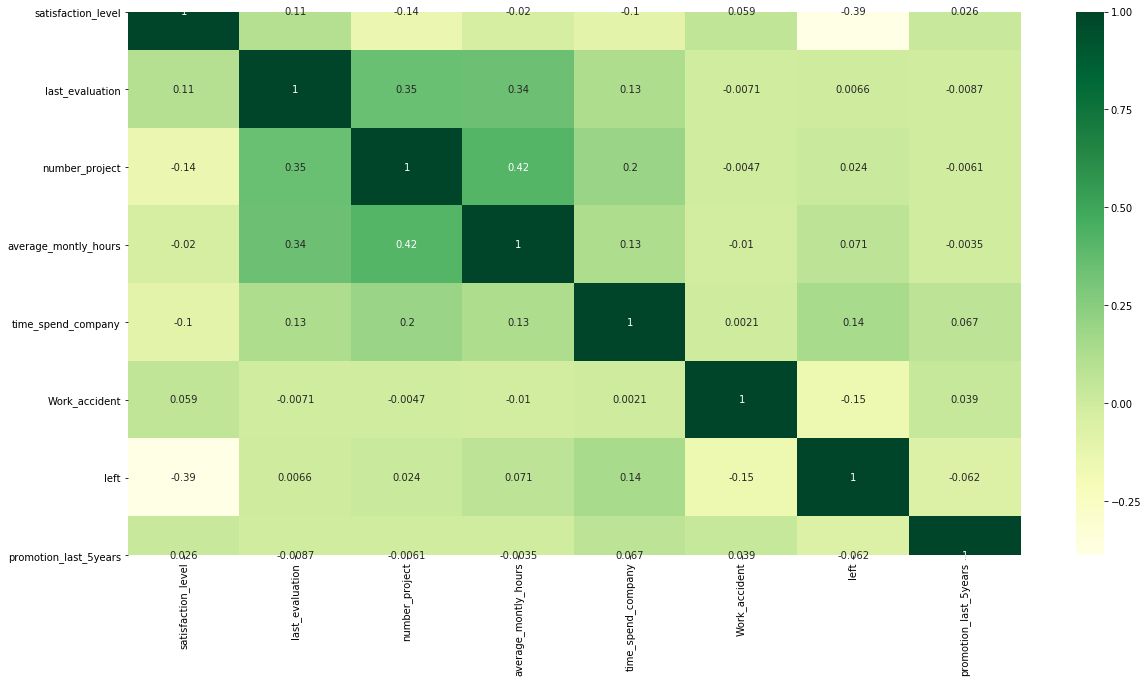

In [92]:
sns.heatmap(hr.corr(), annot=True, cmap='YlGn') 

tbl = plt.gcf()

tbl.set_size_inches(20, 10)
plt.show()

### 4. Визуализировать несколько взаимосвязей между переменными

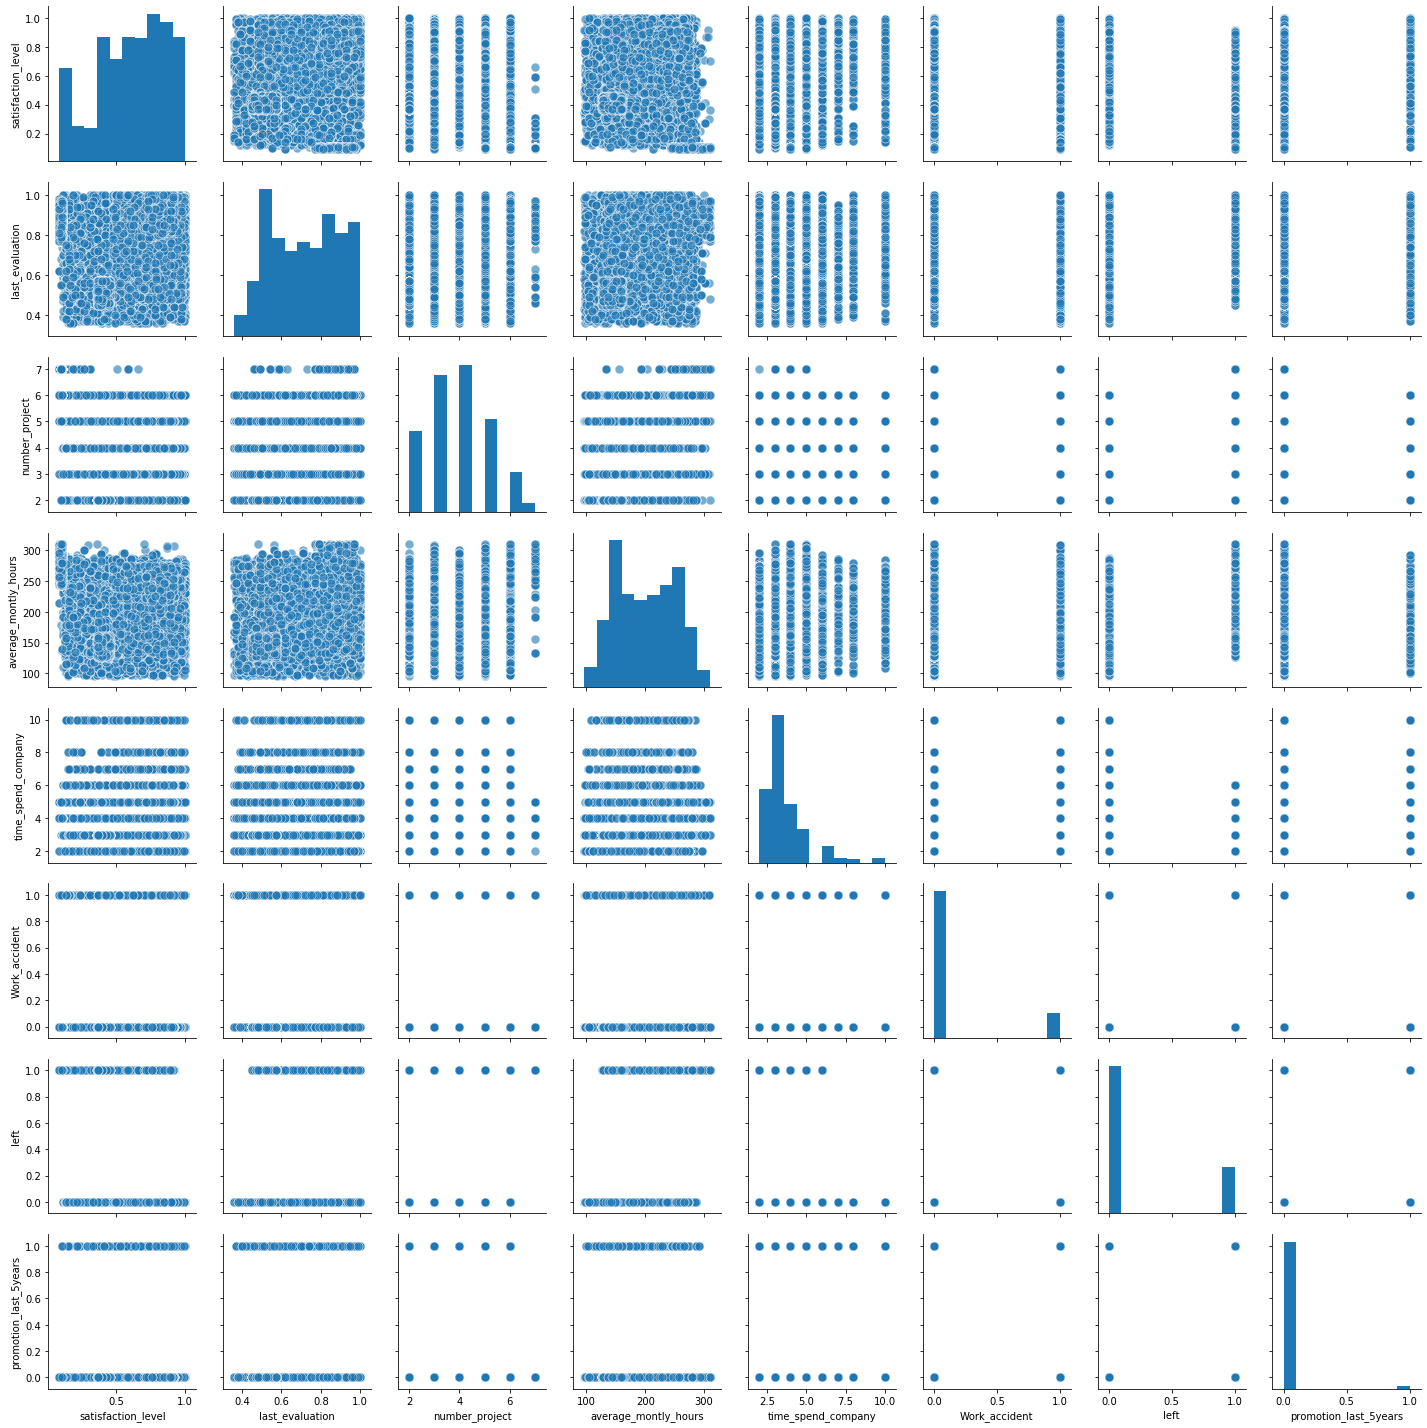

In [140]:
#выбираем переменные
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']], plot_kws={'alpha': 0.6, 's': 80})

### 5. С использованием t-test статистики проверить взаимосвязи между несколькими выборками (двумя или больше)

### 6. Рассчитать сколько работников работает в каждом департаменте

In [111]:
department_employees = hr.groupby(hr['sales']).count().reset_index()[['sales', 'left']]
department_employees.rename(columns={'left': 'count_employees'}, inplace=True)
department_employees.sort_values('count_employees', ascending=False)

,sales,count_employees
7,sales,4140
9,technical,2720
8,support,2229
0,IT,1227
6,product_mng,902
5,marketing,858
1,RandD,787
2,accounting,767
3,hr,739
4,management,630


### 7. Показать распределение сотрудников по зарплатам

In [113]:
salary = df.groupby('salary').agg({'salary': ['count']})
salary

,salary
,count
salary,
high,1237
low,7316
medium,6446


### 8. Показать распределение сотрудников по зарплатам совместно с департаментами

In [119]:
department_salary = hr.groupby(['salary', 'sales']).agg({'salary': ['count']})
department_salary

salary
                    count
salary sales             
high   IT              83
       RandD           51
       accounting      74
       hr              45
       management     225
       marketing       80
       product_mng     68
       sales          269
       support        141
       technical      201
low    IT             609
       RandD          364
       accounting     358
       hr             335
       management     180
       marketing      402
       product_mng    451
       sales         2099
       support       1146
       technical     1372
medium IT             535
       RandD          372
       accounting     335
       hr             359
       management     225
       marketing      376
       product_mng    383
       sales         1772
       support        942
       technical     1147

### 9. Сколько сотрудников покинули компанию

In [120]:
df.left.sum()

3571

### 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию